In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Preprocessing

In [5]:
ren = {i:j for i,j in zip(df.columns, [i.lower() for i in df.columns])}
ren

{'HelpfulnessDenominator': 'helpfulnessdenominator',
 'HelpfulnessNumerator': 'helpfulnessnumerator',
 'Id': 'id',
 'ProductId': 'productid',
 'ProfileName': 'profilename',
 'Score': 'score',
 'Summary': 'summary',
 'Text': 'text',
 'Time': 'time',
 'UserId': 'userid'}

In [6]:
df = df.rename(columns=ren)
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['helpful%'] = np.where(df['helpfulnessdenominator']>0, df['helpfulnessnumerator']/df['helpfulnessdenominator'], -1)
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text,helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [8]:
df['%upvote'] = pd.cut(df['helpful%'], bins=[-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text,helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


## EDA

In [10]:
df_s = df.groupby(['score', '%upvote']).agg({'id': 'count'}).reset_index()
df_s

,score,%upvote,id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [11]:
pivot = df_s.pivot(index='%upvote', columns='score')
pivot

id                            
score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

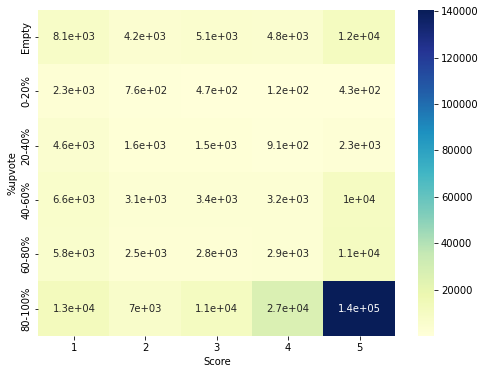

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.xlabel('Score')
plt.xticks(np.arange(0.5,5,1), [1,2,3,4,5]);

## Training

In [13]:
df['score'].unique()

array([5, 1, 4, 2, 3])

In [14]:
df2 = df[df['score']!=3]

In [15]:
X = df2['text']

In [16]:
X

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: text, Length: 525814, dtype: object

In [17]:
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['score'].map(y_dict)

In [18]:
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

In [19]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'être' 'île' 'ît']


In [20]:
X_vec.shape

(525814, 114969)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25)

In [22]:
X_train.shape, X_test.shape

((394360, 114969), (131454, 114969))

In [23]:
log = LogisticRegression()

In [24]:
log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Evaluation

In [25]:
log.score(X_test, y_test)

0.9372404034871514

In [26]:
w = vectorizer.get_feature_names()
coeff = log.coef_[0].tolist()
df_coef = pd.DataFrame({'word': w, 'coef': coeff})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
df_coef.sort_values(['coef', 'word'], ascending=False).head(20)

,word,coef
80600,pleasantly,4.041065
39072,downside,3.680131
94667,skeptical,2.899646
5865,addicting,2.666283
87967,resist,2.435849
113138,worries,2.318967
35726,delish,2.309008
39214,drawback,2.306099
111911,whim,2.284660
55029,hooked,2.273904


In [28]:
df_coef.sort_values(['coef', 'word'], ascending=False).tail(20)

,word,coef
50059,glowing,-2.365626
28122,choked,-2.382811
23814,bummer,-2.391478
62401,lacked,-2.392500
58720,invest,-2.402490
110404,vomited,-2.451349
37563,disappointment,-2.544948
65064,lousy,-2.595211
35220,defeats,-2.602565
41118,embarrassed,-2.777230


In [33]:
predictions = log.predict(X_test)
cm = confusion_matrix(predictions, y_test)
print(cm)
accuracy_score(predictions, y_test)

[[ 15057   2784]
 [  5466 108147]]


0.9372404034871514

In [29]:
texts = ['awesome, really worth to buy',
         'disgusting the product really bad',
         'i like this product, but it taste regular']

In [30]:
log.predict(vectorizer.transform(texts))

array([1, 0, 1])